Name:Raghav Pande  <br>
zID: z5522208  <br>
Assignment-2

In [2]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

#Taxi environment
env = gym.make("Taxi-v3",render_mode='ansi')
state=env.reset()

In [7]:
# Q-Learning Algo
def qLearn(env,alpha,gamma,episodes,epsilon,epsilonFlag):
    qTab=np.zeros([env.observation_space.n, env.action_space.n])
    totRew=[]
    totSteps=[]
    maxE=1.0
    minE=0.01
    decayR=0.005
    for episode in range(episodes):
        state=env.reset()[0]
        epiRew=0
        steps=0
        done=False
        while not done:
            if epsilonFlag==0:
                action = np.argmax(qTab[state]) #Greedy
            elif epsilonFlag==1:
                if random.uniform(0, 1) < epsilon:
                    action = env.action_space.sample()  # Explore action space
                else:
                    action = np.argmax(qTab[state])
                    
            nextState,reward, done, _ ,_= env.step(action)
            qTab[state, action] = qTab[state, action]+alpha*((reward + gamma * np.max(qTab[nextState]))-qTab[state, action])
            state=nextState
            epiRew+=reward
            steps+=1
            
        if epsilonFlag == 1:
            epsilon = minE + (maxE - minE) * np.exp(-decayR * episode)
        totRew.append(epiRew)
        totSteps.append(steps)
    np.save('q_table.npy', qTab)
    return qTab,totRew,totSteps
    
# Hyperparameters for Q-Learning Agent
alpha=0.7
gamma=0.8
epsilon=1.0
episodes=4000
epsilonFlag=1

# Train the Q-learning model
qTab, qRewards, qSteps = qLearn(env,alpha,gamma,episodes,epsilon,epsilonFlag)
print("Q-learning training finished.\n")

Q-learning training finished.



In [8]:
# SARSA Algo
def sarsa(env,alpha,gamma,epsilon,episodes,epsilonFlag):
    sarsaTab = np.zeros([env.observation_space.n, env.action_space.n])
    totRew = []
    totSteps = []
    maxE = 1.0
    minE = 0.01
    decayR = 0.005

    for episode in range(episodes):
        state = env.reset()[0]
        if epsilonFlag==0:
            action=np.argmax(sarsaTab[state])
        elif epsilonFlag==1:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action=np.argmax(sarsaTab[state])
                
        epiRew = 0
        steps = 0
        done = False

        while not done:
            nextState,reward,done,_,_=env.step(action)
            if epsilonFlag==0:
                nextAction=np.argmax(sarsaTab[nextState]) #Greedy
            elif epsilonFlag==1:
                if random.uniform(0, 1) < epsilon:
                    nextAction = env.action_space.sample()   # Explore action space
                else:
                    nextAction=np.argmax(sarsaTab[nextState])

            sarsaTab[state,action]+=alpha*(reward+gamma*sarsaTab[nextState,nextAction]-sarsaTab[state,action])

            state, action = nextState, nextAction
            epiRew += reward
            steps +=1
            
        if epsilonFlag == 1:
            epsilon = minE + (maxE - minE) * np.exp(-decayR * episode)
            # epsilon = max(minE, epsilon * decayR)
        totRew.append(epiRew)
        totSteps.append(steps)
    np.save('sarsa_table.npy', sarsaTab)
    return sarsaTab, totRew, totSteps

# Hyperparameters for SARSA Agent
alpha = 0.7 
gamma = 0.7 
epsilon = 1.0
episodes = 4000
epsilonFlag = 0

# Train the SARSA model
sarsaTab, sarsaRewards, sarsaSteps = sarsa(env,alpha,gamma,epsilon,episodes,epsilonFlag)
print("SARSA training finished.\n")

SARSA training finished.



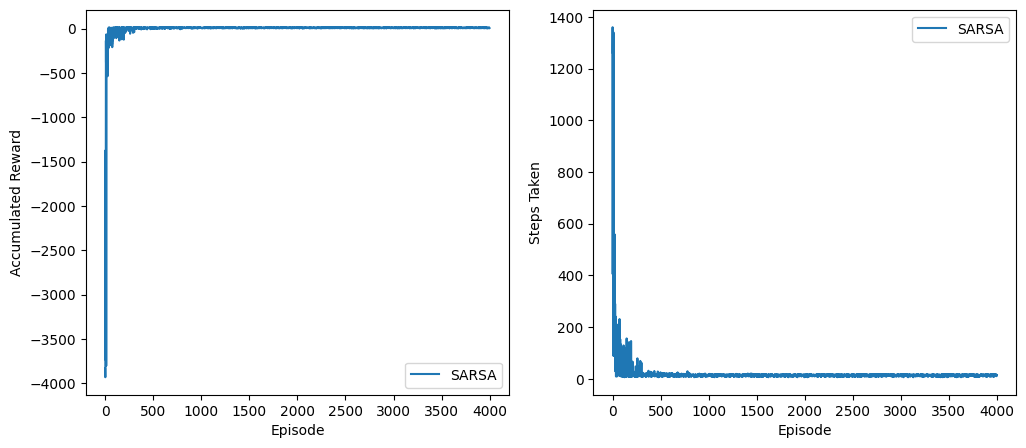

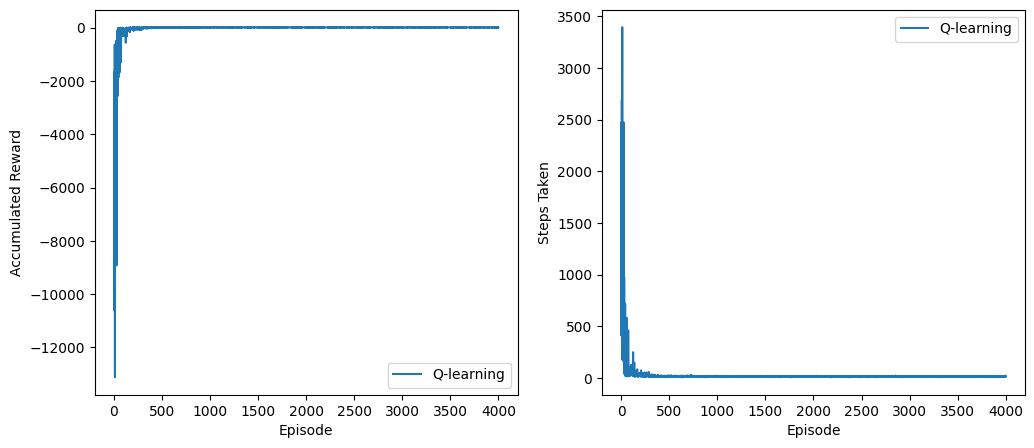

Q-tables saved.



In [ ]:
# Plot the accumulated rewards and steps
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(sarsaRewards, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Accumulated Reward')
plt.legend()

plt.subplot(122)
plt.plot(sarsaSteps, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Steps Taken')
plt.legend()

plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(qRewards, label='Q-learning')
plt.xlabel('Episode')
plt.ylabel('Accumulated Reward')
plt.legend()

plt.subplot(122)
plt.plot(qSteps, label='Q-learning')
plt.xlabel('Episode')
plt.ylabel('Steps Taken')
plt.legend()

plt.show()

# Save the Q-tables
np.save('q_table.npy', qTab)
np.save('sarsa_table.npy', sarsaTab)

print("Q-tables saved.\n")

In [3]:
# Trained agent evaluation
def evalQ(env,table, episodes):  
    maxSteps=100
    totRew,totSteps,totPenal=0,0,0
    
    for episode in range(episodes):
        state = env.reset()[0]
        steps, epiPenal, epiReward = 0, 0, 0
        done = False
        while not done and steps<=maxSteps:
            action=np.argmax(table[state])
            state, reward, done, _,_ = env.step(action)

            if reward !=20:
                epiPenal+= 1

            steps+= 1
            totRew += reward
            if done ==True:
                break

        totPenal+= epiPenal
        totSteps+= steps

    print(f"Results after {episodes} episodes:")
    print(f"Average steps per episode: {totSteps / episodes}")
    print(f"Average accumulated reward per episode: {totRew / episodes}")


# Trained agent visualization
def visualAgent(env, table):
    env.reset()
    state = env.reset()[0]
    totRew=0      
    done = False
    steps = 0
    flag=1
    print(env.render())

    while not done:
        action=np.argmax(table[state])
        state,reward,done,_,_=env.step(action)
        totRew+=reward
        # nextAction=np.argmax(table[state])
        print(env.render())
        print(f'Step {steps}')
        print(f"State: {state}, Action = {action}, Reward = {reward}, Total Accumulated Reward: {totRew}\n")
        steps += 1
        if steps >= 100:
            flag=0
            break
    if flag==1:
        print(f"Completed an episode in {steps} steps")
    else:
        print("Took more than 100 steps for an single episode")


In [4]:
def evalSarsa(env,table, episodes):
    maxSteps=100
    totRew,totSteps,totPenal=0,0,0
    
    for episode in range(episodes):
        # print(1)
        state = env.reset()[0]
        steps, epiPenal, epiReward = 0, 0, 0
        done = False
        action=np.argmax(table[state])
        while not done and steps<maxSteps:
            nextState, reward, done, _,_ = env.step(action)
            nextAction=np.argmax(table[nextState])
            state=nextState
            action=nextAction
            epiReward+=reward
            steps+=1
            if done==True:
                break
        totRew+=epiReward
        totSteps+=steps
    print(f"Results after {episodes} episodes:")
    print(f"Average steps per episode: {totSteps / episodes}")
    print(f"Average accumulated reward per episode: {totRew / episodes}")



In [5]:
# For discussion in week 10
print("Loading Q table stored....")
qTab = np.load('q_table.npy')
numEpisodes=200
print(f"Evaluating the result of the Q Learning agent for {numEpisodes} Episodes")
evalQ(env,qTab,numEpisodes)
print("Visualizing the Q-Learning agent:")
visualAgent(env, qTab)


Loading Q table stored....
Evaluating the result of the Q Learning agent for 200 Episodes
Results after 200 episodes:
Average steps per episode: 13.555
Average accumulated reward per episode: 7.235
Visualizing the Q-Learning agent:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 0
State: 242, Action = 3, Reward = -1, Total Accumulated Reward: -1

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 1
State: 222, Action = 3, Reward = -1, Total Accumulated Reward: -2

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 2
State: 122, Action = 1, Reward = -1, Total Accumulated Reward: -3

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 3
State: 102, Action = 3, Reward = -1, Total Accumulated Reward: -4

+--------

C:\Users\rpand\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [6]:
print("Loading SARSA Q table stored....")
sarsaTab=np.load('sarsa_table.npy')
print("Evaluating the result of the SARSA agent for 100 Episodes")
evalSarsa(env,sarsaTab,numEpisodes)
print("Visualizing the SARSA agent:")
visualAgent(env, sarsaTab)

Loading SARSA Q table stored....
Evaluating the result of the SARSA agent for 100 Episodes
Results after 200 episodes:
Average steps per episode: 13.09
Average accumulated reward per episode: 7.91
Visualizing the SARSA agent:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 0
State: 228, Action = 1, Reward = -1, Total Accumulated Reward: -1

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 1
State: 208, Action = 3, Reward = -1, Total Accumulated Reward: -2

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 2
State: 308, Action = 0, Reward = -1, Total Accumulated Reward: -3

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 3
State: 408, Action = 0, Reward = -1, Total Accumulated Reward: -4

+---------+
|